In [2]:
import pandas as pd

In [3]:
# Load the dataset
file_path = "C:/Users/sushm/OneDrive/Documents/finalresearch/dataset/UPS_Facilities.csv"  # CSV file path
dataset = pd.read_csv(file_path)

# Display basic information about the dataset
print(dataset.info())

# Display the first few rows of the dataset
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49317 entries, 0 to 49316
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       49317 non-null  int64  
 1   X           49317 non-null  float64
 2   Y           49317 non-null  float64
 3   FID         49317 non-null  int64  
 4   FEATURE_ID  49317 non-null  int64  
 5   NAME        49317 non-null  object 
 6   ADDRESS     49317 non-null  object 
 7   ADDRESS2    49317 non-null  object 
 8   ADDRESS3    49317 non-null  object 
 9   CITY        49317 non-null  object 
 10  STATE       49317 non-null  object 
 11  ZIP         49317 non-null  int64  
 12  PHONE       49317 non-null  object 
 13  LATITUDE    49317 non-null  float64
 14  LONGITUDE   49317 non-null  float64
 15  MATCHSTATU  49317 non-null  object 
 16  PLACEMENT   49317 non-null  object 
 17  CENSUSCODE  49317 non-null  object 
 18  BUSINESSNA  49316 non-null  object 
dtypes: float64(4), int64(4), 

In [4]:
# Filter out entries from Hawaii and Alaska
filtered_dataset = dataset[~dataset['STATE'].isin(['HI', 'AK'])]

# Display the number of remaining entries and a sample of the data
print(f"Number of entries after filtering: {filtered_dataset.shape[0]}")
print(filtered_dataset.head())

Number of entries after filtering: 49180
   index          X          Y   FID  FEATURE_ID          NAME  \
0      0 -77.896729  34.042373  4001       21735  UPS Drop Box   
1      1 -78.400208  33.957408  4002       21739  UPS Drop Box   
2      2 -78.531434  35.949646  4003       14826  UPS Drop Box   
3      3 -78.383910  33.974275  4004       21740  UPS Drop Box   
4      4 -77.966664  35.973269  4005       14827  UPS Drop Box   

                 ADDRESS ADDRESS2 ADDRESS3            CITY STATE    ZIP  \
0  1009 N Lake Park Blvd                    Carolina Beach    NC  28428   
1         624 Village Rd                         Shallotte    NC  28470   
2           2008 Main St                       Wake Forest    NC  27587   
3           4619 Main St                         Shallotte    NC  28470   
4        117 W Church St                         Nashville    NC  27856   

          PHONE   LATITUDE  LONGITUDE MATCHSTATU PLACEMENT       CENSUSCODE  \
0  910-798-0400  34.042373 -77.8

In [5]:
# Filter the dataset to keep only rows with "Authorized UPS Facility" or "UPS Drop Box" in the 'NAME' column
filtered_facilities = filtered_dataset[filtered_dataset['NAME'].isin(['Authorized Shipping Outlet', 'UPS Drop Box'])]

# Display the number of remaining entries and a sample of the data
print(f"Number of entries after filtering: {filtered_facilities.shape[0]}")
print(filtered_facilities.head())

Number of entries after filtering: 42298
   index          X          Y   FID  FEATURE_ID          NAME  \
0      0 -77.896729  34.042373  4001       21735  UPS Drop Box   
1      1 -78.400208  33.957408  4002       21739  UPS Drop Box   
2      2 -78.531434  35.949646  4003       14826  UPS Drop Box   
3      3 -78.383910  33.974275  4004       21740  UPS Drop Box   
4      4 -77.966664  35.973269  4005       14827  UPS Drop Box   

                 ADDRESS ADDRESS2 ADDRESS3            CITY STATE    ZIP  \
0  1009 N Lake Park Blvd                    Carolina Beach    NC  28428   
1         624 Village Rd                         Shallotte    NC  28470   
2           2008 Main St                       Wake Forest    NC  27587   
3           4619 Main St                         Shallotte    NC  28470   
4        117 W Church St                         Nashville    NC  27856   

          PHONE   LATITUDE  LONGITUDE MATCHSTATU PLACEMENT       CENSUSCODE  \
0  910-798-0400  34.042373 -77.8

In [6]:
# Remove rows with missing values
cleaned_dataset = filtered_facilities.dropna()

# Display the number of remaining entries after removing missing values
print(f"Number of entries after removing missing values: {cleaned_dataset.shape[0]}")

Number of entries after removing missing values: 42297


In [7]:
# Define a function to calculate IQR and filter out outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the IQR method to the latitude and longitude columns
filtered_cleaned_dataset = remove_outliers_iqr(cleaned_dataset, 'LATITUDE')
filtered_cleaned_dataset = remove_outliers_iqr(filtered_cleaned_dataset, 'LONGITUDE')

# Display the number of remaining entries after removing outliers using IQR
print(f"Number of entries after removing outliers using IQR: {filtered_cleaned_dataset.shape[0]}")

Number of entries after removing outliers using IQR: 42248


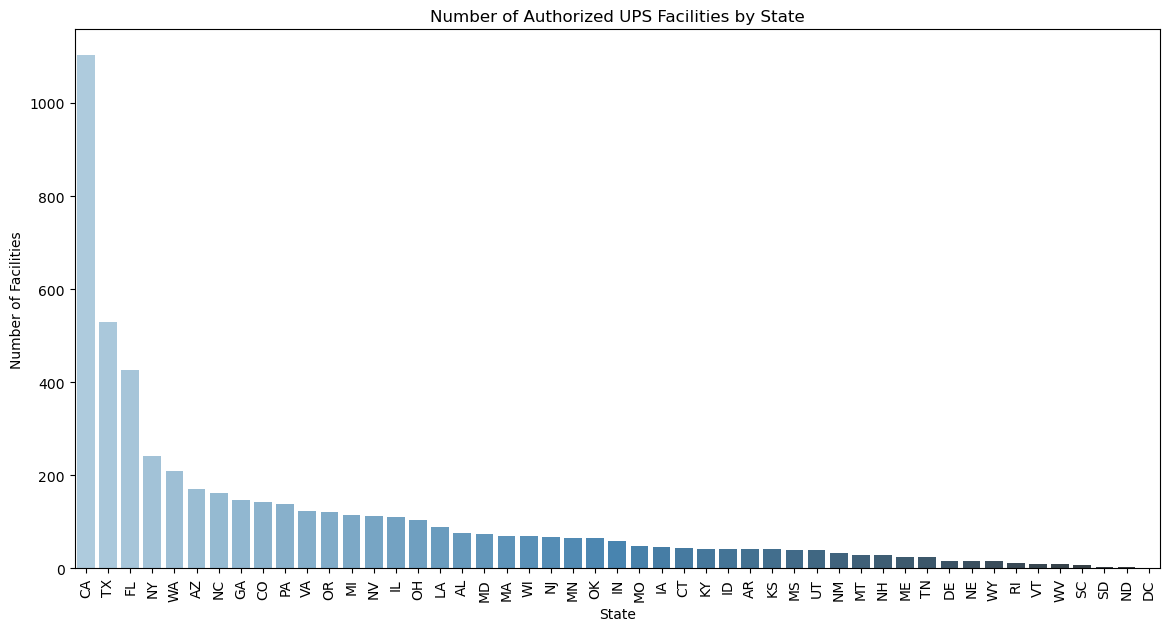

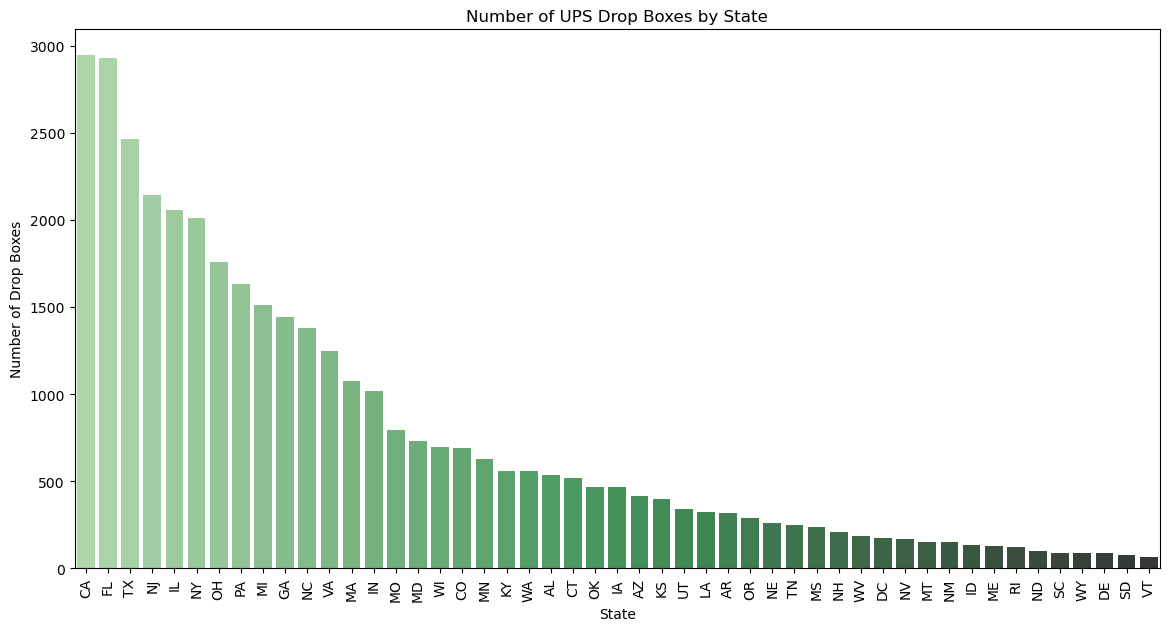

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of facilities and drop boxes by state
facility_counts = filtered_cleaned_dataset[filtered_cleaned_dataset['NAME'] == 'Authorized Shipping Outlet']['STATE'].value_counts() #this is the warehouse location
dropbox_counts = filtered_cleaned_dataset[filtered_cleaned_dataset['NAME'] == 'UPS Drop Box']['STATE'].value_counts() # this is the delivery location
 
# Plot the counts for Authorized UPS Facilities
plt.figure(figsize=(14, 7))
sns.barplot(x=facility_counts.index, y=facility_counts.values, palette="Blues_d")
plt.title('Number of Authorized UPS Facilities by State')
plt.xlabel('State')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=90)
plt.show()

# Plot the counts for UPS Drop Boxes
plt.figure(figsize=(14, 7))
sns.barplot(x=dropbox_counts.index, y=dropbox_counts.values, palette="Greens_d")
plt.title('Number of UPS Drop Boxes by State')
plt.xlabel('State')
plt.ylabel('Number of Drop Boxes')
plt.xticks(rotation=90)
plt.show()

In [9]:
import pandas as pd

# Define the target number of entries
target_entries = 12000

# Calculate the total entries to ensure proportional sampling
total_entries = filtered_cleaned_dataset.shape[0]

# Calculate the proportion of each type within each state
proportions = filtered_cleaned_dataset.groupby(['STATE', 'NAME']).size().reset_index(name='count')
proportions['proportion'] = proportions['count'] / total_entries

# Calculate target samples per group based on the proportions
proportions['target_count'] = (proportions['proportion'] * target_entries).round().astype(int)

# Sample the data according to the target counts
sampled_data = pd.DataFrame()

for _, row in proportions.iterrows():
    subset = filtered_cleaned_dataset[
        (filtered_cleaned_dataset['STATE'] == row['STATE']) &
        (filtered_cleaned_dataset['NAME'] == row['NAME'])
    ]
    sampled_subset = subset.sample(n=row['target_count'], random_state=42)  # Use a fixed random_state for reproducibility
    sampled_data = pd.concat([sampled_data, sampled_subset])

# Shuffle the final sampled dataset
sampled_data = sampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the number of entries in the sampled dataset
print(f"Total number of entries in the sampled dataset: {sampled_data.shape[0]}")

Total number of entries in the sampled dataset: 12004


In [10]:
# Define the file path where you want to save the CSV
output_file_path = 'sampled_dataset.csv'

# Save the sampled dataset to a CSV file
sampled_data.to_csv(output_file_path, index=False)

print(f"Sampled dataset saved as {output_file_path}")

Sampled dataset saved as sampled_dataset.csv
